/home/sstjaernholm/nuNet/common/analysis/energy/toolbox.py:231: RuntimeWarning: invalid value encountered in true_divide
  H_norm_rows = Hmasked / np.outer(Hmasked.sum(axis=1, keepdims=True), np.ones(H.shape[1]))


0.21013870541611626
0.19828270101264642
0.19035576757284903


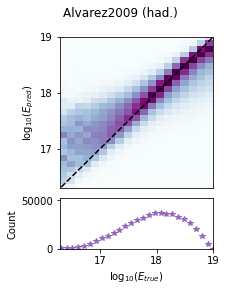

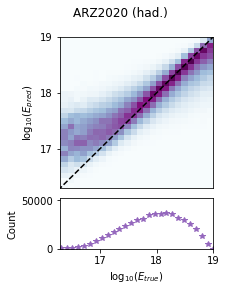

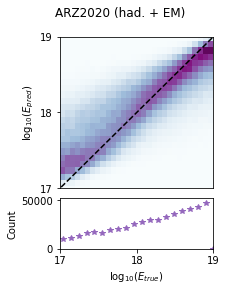

In [19]:
from matplotlib import pyplot as plt
from toolbox import get_histogram2d, get_pred_energy_diff_data, get_2dhist_normalized_columns
import numpy as np
from matplotlib.ticker import MaxNLocator

plt.rcParams["figure.figsize"] = (3,4.15)

# run_id = "E9.1"
for run_id in ["E12.1", "E9.1", "E13.1"]:

    # Save the run name
    run_name = f"run{run_id}"

    # Constants
    cmap = "BuPu"
    xlabel = r"$\log_{10}(E_{true})$"
    ylabel = r"$\log_{10}(E_{pred})$"
    bins = 30
    plot_title = f"Heatmap of predicted and true shower energies for {run_name}"
    clim = [0, 0.2]

    if run_id == "E12.1": # Alvarez2009 (had.)
        # plot_title = "Heatmap of predicted and true shower energies\nfor dataset Alvarez2009 (had.)"
        plot_title = "Alvarez2009 (had.)"
        dataset_to_use = "ALVAREZ-HAD"
    elif run_id == "E9.1": # ARZ2020 (had.)
        # plot_title = "Heatmap of predicted and true shower energies\nfor dataset ARZ2020 (had.)"
        plot_title = "ARZ2020 (had.)"
        dataset_to_use = "ARZ-HAD"
    elif run_id == "E13.1": # ARZ2020 (had. + EM)
        # plot_title = "Heatmap of predicted and true shower energies\nfor dataset ARZ2020 (had. + EM)"
        plot_title = "ARZ2020 (had. + EM)"
        dataset_to_use = "ARZ-EM"

        
    with open(f"{dataset_to_use}_weights.npy", "rb") as f:  
        file_contents = np.load(f)
        WEIGHTING_energy_list = file_contents[:, 0]
        WEIGHTING_weight_list = file_contents[:, 1]
        WEIGHTING_count_list = file_contents[:, 2]  
    
    # print(WEIGHTING_count_list)
    # print(WEIGHTING_energy_list)


    # %%
    energy_difference_data, shower_energy_log10_predict, shower_energy_log10 = get_pred_energy_diff_data(run_name, True)

    # for cscale in ["linear", "log"]:
    for cscale in ["linear"]:
        # fig = plt.figure()
        # ax = plt.gca()

        # Also plot a heatmap of the scatter plot instead of just dots
        # fig, ax, im = get_histogram2d(shower_energy_log10, shower_energy_log10_predict, fname=file_name, title=plot_title, xlabel=xlabel, ylabel=ylabel, bins=bins, cmap=cmap, cscale=cscale)
        # fig, ax, im = get_2dhist_normalized_columns(X=shower_energy_log10, Y=shower_energy_log10_predict, fname=file_name, title=plot_title, xlabel=xlabel, ylabel=ylabel, bins=bins, cmap=cmap, cscale=cscale)
        fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1]})
        pc, cb = get_2dhist_normalized_columns(X=shower_energy_log10, Y=shower_energy_log10_predict, fig=fig, ax=ax1, cmap=cmap, binsx=bins, binsy=bins, clim=clim)
        # ax1.set_aspect('equal', 'box')
        ax2.set_xlabel(xlabel)
        ax1.set_ylabel(ylabel)
        ax2.set_ylabel("Count")
        ax1.axes.xaxis.set_visible(False) # hide first y axis
        # ax2.axes.yaxis.set_visible(False) # hide second y axis
        # ax2.set_yticklabels([]) # Better way to hide second y axis instead, to keep the label
        ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
        
        plt.subplots_adjust(hspace=0.1, left=0.22, right=0.93, bottom=0.17)

        # Plot a black line through the middle
        xmin = min(shower_energy_log10_predict)
        xmax = max(shower_energy_log10_predict)
        ymin = min(shower_energy_log10)
        ymax = max(shower_energy_log10)

        ax1.plot([min(xmin, ymin), max(xmax, ymax)], [min(xmin, ymin), max(xmax, ymax)], 'k--')

        ax2.plot(WEIGHTING_energy_list, WEIGHTING_count_list / np.sum(WEIGHTING_count_list), '*', color="tab:purple")

        # Defining custom 'xlim' and 'ylim' values.
        custom_xlim = (16.3, 19)
        custom_ylim = (16.3, 19)

        ylim_ax2 = (0, 0.11)

        if run_id == "E13.1":
            custom_xlim = (17, 19)
            custom_ylim = (17, 19)

        # # Setting the values for all axes.
        plt.setp(ax1, xlim=custom_xlim, ylim=custom_ylim)
        plt.setp(ax2, xlim=custom_xlim, ylim=ylim_ax2)

        # Add margin to the right of bottom plot
        # ax2.use_sticky_edges = False 
        ax1.margins(0.9, 0)
        # ax2.set_xmargin(2); 
        # ax2.autoscale_view()

        # ax1.set_xlim(16.3, 19)
        # ax1.set_ylim(16.3, 19)
        # ax2.set_xlim(16.3, 19)

        # if run_id == "E13.1":
        #     ax1.set_xlim(17, 19)
        #     ax1.set_ylim(17, 19)
        #     ax2.set_xlim(17, 19)

        
        plt.suptitle(plot_title)
        # plt.tight_layout()
        plt.savefig(f"plots/scatter_2dhistogram_{run_name}_cscale{cscale}_normalized_coordinate.png", dpi=300)
        plt.savefig(f"plots/scatter_2dhistogram_{run_name}_cscale{cscale}_normalized_coordinate.eps", format="eps")

        # cb = fig.colorbar(pc, ax=ax1, orientation='vertical')
        # ax1.remove()
        # ax2.remove()
        # fig.suptitle("")

        # plt.savefig(f"plots/CBAR_scatter_2dhistogram_{run_name}_cscale{cscale}_normalized_coordinate.png", dpi=300)
        # plt.savefig(f"plots/CBAR_scatter_2dhistogram_{run_name}_cscale{cscale}_normalized_coordinate.eps", format="eps")